# Age & Tenure of leadership in the LDS church

this project is supposed to do the following:
- create a database of the age and calling date 

hypothesis:
- lds leaders are called later in life and serve shorter, especially first presidency and prophet

notes:
- apostle means any role in quorum, presidency or prophet
- quorum is only the quorum of the 12
- president is president of the quorum and not necessarily prophet

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from datetime import datetime

#### step 1: make a dictionary of all the names in wiki_table

In [123]:
def file_to_str(filename):
    with open(filename) as f:
        return f.read().lower()
    
s = file_to_str('wiki_table.txt')

names = re.findall(r'bar:(\w+) text:(\w+ \w+ ?\w+)\n', s)
names_dict = dict(names)

#### step 2: make dataframe from wikipedia timeline

In [124]:
# info = re.findall(r'bar:(\w+) from:(\d.+) till:(\d.+) color:(\w+)', s) # get all info from wiki_table
# df_a = pd.DataFrame.from_records(info, columns = ['name', 'date_called', 'date_released', 'calling']) # make a dataframe for the info
# df_a.replace({'name': names_dict}, inplace=True) #replace name keys with names

In [125]:
#temp
info = re.findall(r'bar:(\w+) from:(\d.+) till:(\d.+|{{.+}}) color:(\w+)', s) # get all info from wiki_table
df_a = pd.DataFrame.from_records(info, columns = ['name', 'date_called', 'date_released', 'calling']) # make a dataframe for the info
df_a.replace({'name': names_dict}, inplace=True) #replace name keys with names

In [126]:
# REPLACE WITH CURRENT DATE
df_a.replace('{{#time:m/d/y}}', '2/25/2022', regex=True, inplace=True)

In [127]:
df_a['date_released'] = pd.to_datetime(df_a['date_released'])
df_a['date_called'] = pd.to_datetime(df_a['date_called'])
df_a['calling_length'] = (df_a['date_released']-df_a['date_called'])

#### step 3: add date of birth

In [128]:
# names_switch = {y:x for x,y in names_dict.items()} # just to get the dict that you'll fill in by hand
dob_dict = {'joseph smith': '12/23/1805',
 'oliver cowdery': '10/3/1806',
 'david whitmer': '1/7/1805',
 'martin harris': '5/18/1783',
 'thomas b marsh': '11/1/1800',
 'brigham young': '6/1/1801',
 'heber c kimball': '6/14/1801',
 'orson hyde': '1/8/1805',
 'william e mclellin': '1/18/1806',
 'parley p pratt': '4/12/1807',
 'luke johnson': '11/3/1807',
 'william smith': '3/18/1811',
 'orson pratt': '9/19/1811',
 'john f boynton': '9/20/1811',
 'lyman e johnson': '10/24/1811',
 'john e page': '2/25/1799',
 'john taylor': '11/1/1808',
 'wilford woodruff': '3/1/1807',
 'george a smith': '6/26/1817',
 'willard richards': '6/24/1804',
 'hyrum smith': '2/9/1800',
 'lyman wight': '5/9/1796',
 'amasa m lyman': '3/30/1813',
 'ezra t benson': '2/22/1811',
 'charles c rich': '8/21/1809',
 'lorenzo snow': '4/3/1814',
 'erastus snow': '11/9/1818',
 'franklin d richards': '4/2/1821',
 'jedediah m grant': '2/21/1816',
 'john willard young': '10/1/1844',
 'daniel h wells': '10/27/1814',
 'george q cannon': '1/11/1827',
 'brigham young jr': '12/18/1836',
 'joseph angell young': '10/14/1834',
 'joseph f smith': '11/13/1838',
 'albert carrington': '1/8/1813',
 'moses thatcher': '2/2/1842',
 'francis m lyman': '1/12/1840',
 'john henry smith': '9/18/1848',
 'george teasdale': '12/8/1831',
 'heber j grant': '11/22/1856',
 'john w taylor': '5/15/1858',
 'merriner w merrill': '6/25/1832',
 'anthon h lund': '5/15/1844',
 'abraham h cannon': '3/12/1859',
 'matthias f cowley': '8/25/1858',
 'abraham o woodruff': '11/23/1872',
 'rudger clawson': '3/12/1857',
 'reed smoot': '1/10/1862',
 'hyrum m smith': '3/21/1872',
 'george albert smith': '4/4/1870',
 'charles w penrose': '2/4/1832',
 'george f richards': '2/23/1861',
 'orson f whitney': '7/1/1855',
 'david o mckay': '9/8/1873',
 'anthony w ivins': '9/16/1852',
 'joseph fielding smith': '7/18/1876',
 'james e talmage': '9/21/1862',
 'stephen l richards': '6/18/1879',
 'richard r lyman': '11/23/1870',
 'melvin j ballard': '2/9/1873',
 'john a widtsoe': '1/31/1872',
 'joseph f merrill': '8/24/1868',
 'charles a callis': '5/4/1865',
 'alonzo a hinckley': '4/23/1870',
 'albert e bowen': '10/31/1875',
 'sylvester q cannon': '6/10/1877',
 'harold b lee': '3/25/1899',
 'spencer w kimball': '3/25/1895',
 'ezra taft benson': '8/4/1899',
 'mark e petersen': '11/7/1900',
 'matthew cowley': '8/2/1897',
 'henry d moyle': '4/22/1889',
 'delbert l stapley': '1/11/1896',
 'marion g romney': '9/19/1897',
 'legrand richards': '2/6/1886',
 'adam s bennion': '12/2/1886',
 'richard l evans': '3/23/1906',
 'george q morris': '2/20/1874',
 'hugh b brown': '10/24/1883',
 'howard w hunter': '11/14/1907',
 'gordon b hinckley': '6/23/1910',
 'n eldon tanner': '5/8/1898',
 'thomas s monson': '8/21/1927',
 'alvin r dyer': '1/1/1903',
 'boyd k packer': '9/10/1924',
 'marvin j ashton': '5/6/1915',
 'bruce r mcconkie': '7/29/1915',
 'l tom perry': '8/5/1922',
 'david b haight': '9/2/1906',
 'james e faust': '7/31/1920',
 'neal a maxwell': '7/6/1926',
 'russell m nelson': '9/9/1924',
 'dallin h oaks': '8/12/1932',
 'm russell ballard': '10/8/1928',
 'joseph b wirthlin': '6/1/1917',
 'richard g scott': '11/7/1928',
 'robert d hales': '8/24/1932',
 'jeffrey r holland': '12/3/1940',
 'henry b eyring': '5/31/1933',
 'dieter f uchtdorf': '11/6/1940',
 'david a bednar': '6/15/1952',
 'quentin l cook': '9/8/1940',
 'd todd christofferson': '1/24/1945',
 'neil l anderson': '8/9/1951',
 'ronald a rasband': '2/6/1951',
 'gary e stevenson': '8/6/1955',
 'dale g renlund': '11/13/1952',
 'gerrit w gong': '12/23/1953',
 'ullises soares': '11/2/1958'}

In [129]:
# add DOB column
for key, value in dob_dict.items():
    df_a.loc[df_a['name'] == key, ['dob']] = value

In [130]:
df_a['dob'] = pd.to_datetime(df_a['dob'])
df_a['age_at_calling'] = (df_a['date_called']-df_a['dob'])

In [131]:
#drop all alive
alive = ['m russell ballard', 'jeffry r holland', 'dieter f uchtdorf', 
         'david a bednar', 'quentin l cook', 'd todd christofferson',
        'neil l anderson', 'ronald a rasband', 'gary e stevenson',
        'dale g renlund', 'gerrit w gong', 'ulisses soares',
        'henry b eyring', 'russell m nelson', 'dallin h oaks']
# df_a = df_a[~df_a['name'].isin(alive)]
df_a['alive'] = df_a['name'].isin(alive)

weird = ['john willard young']
df_a = df_a[~df_a['name'].isin(weird)]

excom = []
df_a = df_a[~df_a['name'].isin(excom)]

#drop rows with empty values
df_a.dropna(inplace=True)

In [132]:
#get the names of those alive for dummy vars. Works, but i'm missing names.
name_test = []
for i in df_a['name']:
    for k in alive:
        if str(i) in str(k):
            name_test.append('True')
        else:
            name_test.append('False')

#### convert all to similar datatype

In [133]:
df_a['calling_length'] = df_a['calling_length'].dt.days
df_a['age_at_calling'] = df_a['age_at_calling'].dt.days
df_a['age_at_calling_years'] = [x/365 for x in df_a['age_at_calling']]
df_a['calling_length_years'] = [x/365 for x in df_a['calling_length']]

#### are presidents older?

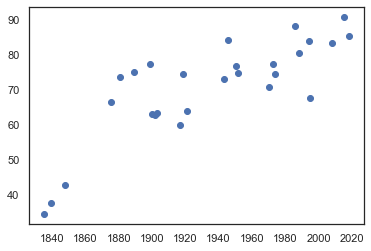

In [134]:
df_pres = df_a.loc[df_a['calling'] == 'pres']
df_apostle = df_a.loc[df_a['calling'] == 'apostle']
plt.scatter(x=df_pres['date_called'], y=df_pres['age_at_calling_years'])

#### same for all apostles?

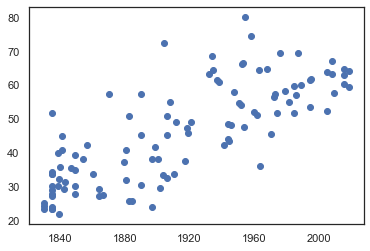

In [135]:
plt.scatter(x=df_apostle['date_called'], y=df_apostle['age_at_calling_years'])

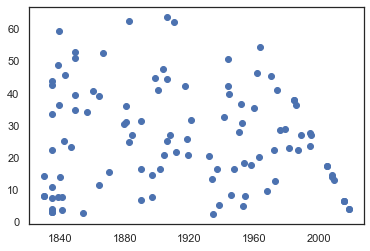

In [136]:
plt.scatter(x=df_apostle['date_called'], y=df_apostle['calling_length_years'])

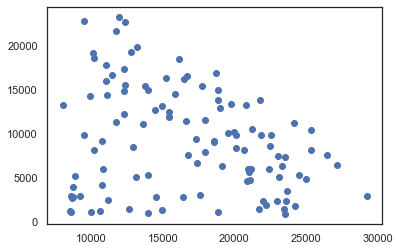

In [137]:
plt.scatter(x=df_apostle['age_at_calling'], y=df_apostle['calling_length'])

<function matplotlib.pyplot.show(close=None, block=None)>

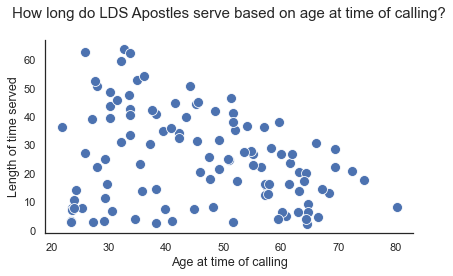

In [138]:
import seaborn as sns
from matplotlib.dates import DateFormatter

#Seaborn settings
sns.set_theme(style='white')

#create plot
fig, ax = plt.subplots()
g = sns.scatterplot(x='age_at_calling_years', y='calling_length_years', data=df_apostle, s=99)

#plot settings
g.axes.set_title('How long do LDS Apostles serve based on age at time of calling?\n', fontsize=15)
g.axes.set_xlabel('Age at time of calling', fontsize=12.5)
g.axes.set_ylabel('Length of time served', fontsize=12.5)

#create and save plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

ax.grid(False)
plt.tight_layout()
plt.show
# plt.savefig('test.pdf', bbox_inches='tight')

In [139]:
df_apostle = df_apostle.round({'age_at_calling_years': 2, 'calling_length_years': 2})

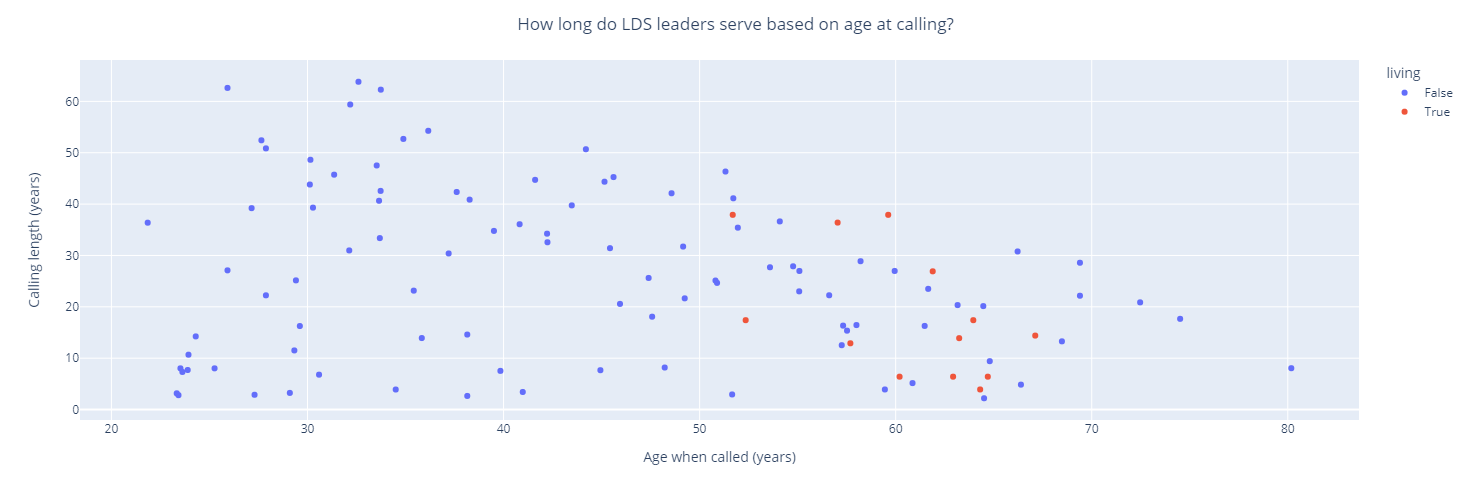

In [140]:
import plotly.express as px

fig = px.scatter(df_apostle, x='age_at_calling_years', 
                 y='calling_length_years',
                 color = 'alive',
                 hover_data=['name'],
                width=800,
                height=500,
                labels={
                    "calling_length_years": "Calling length (years)",
                    "age_at_calling_years":"Age when called (years)",
                    "alive":"living"
                })

fig.update_layout(title_text='How long do LDS leaders serve based on age at calling?', title_x=0.5)
fig.show()

In [141]:
df_a['alive'].value_counts()

False    233
True      32
Name: alive, dtype: int64

In [20]:
df_apostle

,name,date_called,date_released,calling,calling_length,dob,age_at_calling,alive,age_at_calling_years,calling_length_years
0,joseph smith,1830-04-06,1844-06-27,apostle,5196,1805-12-23,8870,False,24.301370,14.235616
1,oliver cowdery,1830-04-06,1838-04-12,apostle,2928,1806-10-03,8586,False,23.523288,8.021918
2,david whitmer,1830-04-06,1838-04-13,apostle,2929,1805-01-07,9220,False,25.260274,8.024658
3,martin harris,1835-01-01,1837-12-10,apostle,1074,1783-05-18,18855,False,51.657534,2.942466
4,brigham young,1835-02-14,1877-08-29,apostle,15537,1801-06-01,12311,False,33.728767,42.567123
...,...,...,...,...,...,...,...,...,...,...
261,ronald a rasband,2015-10-03,2021-10-04,apostle,2193,1951-02-06,23615,True,64.698630,6.008219
263,gary e stevenson,2015-10-03,2021-10-04,apostle,2193,1955-08-06,21973,True,60.200000,6.008219
265,dale g renlund,2015-10-03,2021-10-04,apostle,2193,1952-11-13,22969,True,62.928767,6.008219
267,gerrit w gong,2018-03-31,2021-10-04,apostle,1283,1953-12-23,23474,True,64.312329,3.515068
